# RIDGE REGRESSION

Ridge Regression works like linear regression, except that it prevents the polynomial's coefficients to explode (which usually happens when there are more than two coefficients). 

Ridge regression imposes some structure on the underlying model.
With ridge regression, the coefficients are prevented from growing unboundedly by adding a regularization term to the loss function:

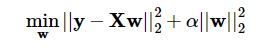

By minimizing this loss function, we not only minimize the error between the model and the data (first term, related to the bias), but also the size of the model's coefficients (second term, related to the variance). The bias-variance trade-off is quantified by the hyperparameter α, which precises the relative weight between the two terms in the loss function.

-  Ridge Regression performs L2 regularization i.e. adds penalty equivalent to __square of the magnitude__ of coefficient.
-  __Minimization objective = LS Obj + $\alpha$ * (sum of square of coefficients).__
    <br>__NOTE__: Here 'LS Obj' is _Least Square Objective_ i.e. the linear regression objective without regularization.
    
    $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
    
    <br>Here, __α__ (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. __α__ can take various values:<br><br>
  1. __$\alpha$ = 0 :__<br>
        -  The objective becomes same as simple linear regression.<br>
        -  We’ll get the same coefficients as simple linear regression.<br>
  2. __$\alpha$ = $infinite$ :__<br>
      -  The coefficients will be zero because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.<br>
  3. __0 < $\alpha$ < $infinite$ :__<br>
      -  The magnitude of α will decide the weightage given to different parts of objective.<br>
      -  The coefficients will be somewhere between 0 and ones for simple linear regression.<br>
 __As the value of $\alpha$ increases, the model complexity decreases.__ <br><br>

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import Ridge

## Importing the dataset

This dataset consists of four files. Two contain the training set, and the remaining two contain the testing test.
The file X_train.csv consists of Dense HOG features computed from different images and the file y_train.csv consists of the head yaw and pitch angles. We would be using only one column of this file i.e the yaw angles for training.
The first column in all four of these files is the running index.

The data has been taken from the following sources:

https://sites.google.com/site/tutheadpose/

http://www.cs.tut.fi/~hehu/HeadPose.pdf

In [ ]:
X_train = pd.read_csv('C:\\Users\\home\\Desktop\\X_train.csv')
y_train = pd.read_csv('C:\\Users\\home\\Desktop\\y_train.csv')
X_test  = pd.read_csv('C:\\Users\\home\\Desktop\\X_test.csv')
y_test  = pd.read_csv('C:\\Users\\home\\Desktop\\y_scoring.csv', usecols=(0,1))

### Skipping the index column

In [60]:
X_train = X_train.iloc[:, 1:].values
y_train = y_train.iloc[:, 1].values
X_test  = X_test.iloc[:, 1:].values
y_test  = y_test.iloc[:, 1].values

### Fitting Ridge Regression to the Training Set and predicting the Test set results for different values of Regularization parameter α

In [70]:
alpha_range = 10.0 ** np.arange(-4,5,0.5)  #alpha_range from 10^-4 to 10^4.5
min_error=12.0
errors = []

for alpha in alpha_range:
    
    regressor = Ridge(alpha)
    regressor.fit(X_train, y_train)     #Fitting to training set
    y_pred = regressor.predict(X_test)  #Predict the test set results
    
    error = np.sum(np.abs(y_pred - y_test))
    
    error = error / y_test.shape[0]     #Mean of error
    print("[alpha = %.2e] Average error = %.2f" % (alpha,error))
    
    if error<min_error:     #Calculating the optimal alpha 
        min_error=error
        opt_alpha=alpha
        
    errors.append(error)
    
print("Optimal alpha = %.2e" % opt_alpha)

[alpha = 1.00e-04] Average error = 19.46
[alpha = 3.16e-04] Average error = 19.39
[alpha = 1.00e-03] Average error = 19.18
[alpha = 3.16e-03] Average error = 18.61
[alpha = 1.00e-02] Average error = 17.40
[alpha = 3.16e-02] Average error = 15.56
[alpha = 1.00e-01] Average error = 13.70
[alpha = 3.16e-01] Average error = 12.10
[alpha = 1.00e+00] Average error = 10.89
[alpha = 3.16e+00] Average error = 10.02
[alpha = 1.00e+01] Average error = 9.54
[alpha = 3.16e+01] Average error = 9.63
[alpha = 1.00e+02] Average error = 10.13
[alpha = 3.16e+02] Average error = 11.26
[alpha = 1.00e+03] Average error = 13.51
[alpha = 3.16e+03] Average error = 18.61
[alpha = 1.00e+04] Average error = 24.74
[alpha = 3.16e+04] Average error = 28.14
Optimal alpha = 1.00e+01


## Plotting error vs Regularization parameter

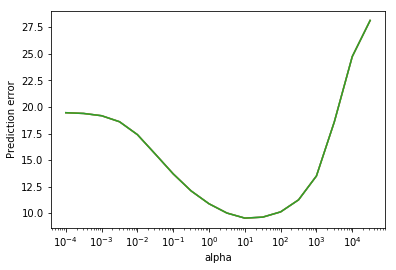

In [64]:
plt.semilogx(alpha_range, errors)
plt.xlabel('alpha')
plt.ylabel('Prediction error')
plt.show()

### Fitting to training set again (using the optimal alpha)

In [91]:
regressor = Ridge(opt_alpha)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## Visualising the training set results 

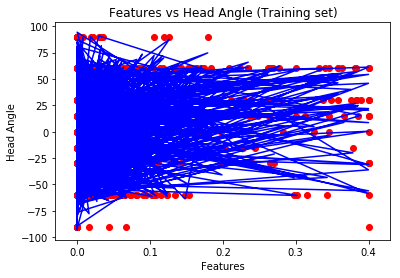

In [92]:
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], regressor.predict(X_train), color = 'blue')
plt.title('Features vs Head Angle (Training set)')
plt.xlabel('Features')
plt.ylabel('Head Angle')
plt.show()

## Visualising the test set results

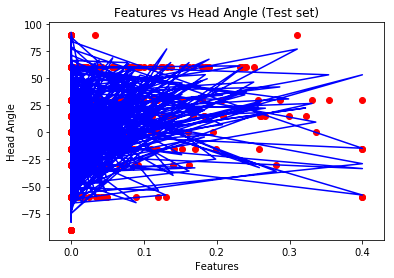

In [95]:
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], regressor.predict(X_test), color = 'blue')
plt.title('Features vs Head Angle (Test set)')
plt.xlabel('Features')
plt.ylabel('Head Angle')
plt.show()